In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Customer_Data.csv')
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Backup     

In [4]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,47.070739,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,16.703633,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,18.000000,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,33.000000,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,46.000000,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,60.000000,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,85.000000,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [5]:
df.isna().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3548
Phone_Service                     0
Multiple_Lines                  622
Internet_Service                  0
Internet_Type                  1390
Online_Security                1390
Online_Backup                  1390
Device_Protection_Plan         1390
Premium_Support                1390
Streaming_TV                   1390
Streaming_Movies               1390
Streaming_Music                1390
Unlimited_Data                 1390
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

In [6]:
df1 = df.copy()

In [7]:



# Step 1: Drop unnecessary columns
columns_to_drop = ['Customer_ID', 'Value_Deal', 'Churn_Category', 'Churn_Reason']
df1.drop(columns=columns_to_drop, axis='columns', inplace=True)


In [8]:

# Step 2: Handle missing values
null_val_cols = ['Multiple_Lines', 'Internet_Type', 'Online_Security', 'Online_Backup',
                 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
                 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data']

for col in null_val_cols:
    mode_value = df1[col].mode()[0]
    df1[col].fillna(mode_value, inplace=True)


In [9]:

# Step 3: Map categorical columns
status_mapping = {'Stayed': 0, 'Joined': 0, 'Churned': 1}
contract_mapping = {'Month-to-Month': 0, 'One Year': 1, 'Two Year': 2}

df1['Customer_Status'] = df1['Customer_Status'].map(status_mapping)
df1['Contract'] = df1['Contract'].map(contract_mapping)


In [10]:

# Step 4: Apply One-Hot Encoding to remaining categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns
df1 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)


In [11]:

# Step 5: Scale numerical features
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])


In [12]:

# Display the processed dataframe
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6418 non-null   float64
 1   Number_of_Referrals          6418 non-null   float64
 2   Tenure_in_Months             6418 non-null   float64
 3   Contract                     6418 non-null   float64
 4   Monthly_Charge               6418 non-null   float64
 5   Total_Charges                6418 non-null   float64
 6   Total_Refunds                6418 non-null   float64
 7   Total_Extra_Data_Charges     6418 non-null   float64
 8   Total_Long_Distance_Charges  6418 non-null   float64
 9   Total_Revenue                6418 non-null   float64
 10  Customer_Status              6418 non-null   float64
 11  Gender_Male                  6418 non-null   uint8  
 12  Married_Yes                  6418 non-null   uint8  
 13  State_Assam       

,Age,Number_of_Referrals,Tenure_in_Months,Contract,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Gender_Male,Married_Yes,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Gujarat,State_Haryana,State_Jammu & Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Odisha,State_Puducherry,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Phone_Service_Yes,Multiple_Lines_Yes,Internet_Service_Yes,Internet_Type_DSL,Internet_Type_Fiber Optic,Online_Security_Yes,Online_Backup_Yes,Device_Protection_Plan_Yes,Premium_Support_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Streaming_Music_Yes,Unlimited_Data_Yes,Paperless_Billing_Yes,Payment_Method_Credit Card,Payment_Method_Mailed Check
0,0.253731,0.466667,0.742857,0.5,0.587184,0.066294,0.000000,0.000000,0.107024,0.079733,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0
1,0.402985,0.933333,0.342857,0.0,0.046602,0.060420,0.769833,0.066667,0.026989,0.049249,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0
2,0.492537,0.266667,0.971429,0.0,0.651650,0.030239,0.000000,0.000000,0.037759,0.032956,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
3,0.910448,0.200000,0.571429,0.0,0.838835,0.140670,0.000000,0.000000,0.101455,0.131975,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,1,0,1,1,0,0
4,0.925373,0.200000,0.200000,0.0,0.729320,0.028687,0.000000,0.000000,0.006211,0.022427,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,1,0


In [13]:
X = df1.drop('Customer_Status',axis=1)
y = df1['Customer_Status']

In [14]:
X.shape, y.shape

((6418, 49), (6418,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Separate features and target
X = df1.drop('Customer_Status', axis=1)
y = df1['Customer_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


In [18]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

# Define custom scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# Perform cross-validation and evaluate each classifier
results = {}
for clf_name, clf in classifiers.items():
    cv_results = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)
    results[clf_name] = {metric: np.mean(scores) for metric, scores in cv_results.items()}
    print(f"{clf_name}: {results[clf_name]}")


C:\Users\sajal\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: {'fit_time': 0.06700806617736817, 'score_time': 0.012506628036499023, 'test_accuracy': 0.8124243856422405, 'test_precision': 0.6817033879941674, 'test_recall': 0.5965942410345086, 'test_f1': 0.6361595361660295, 'test_roc_auc': 0.8588401516140738}
Decision Tree: {'fit_time': 0.04996752738952637, 'score_time': 0.011048126220703124, 'test_accuracy': 0.7438605981577334, 'test_precision': 0.5325969309704967, 'test_recall': 0.5668521163822268, 'test_f1': 0.549062553329569, 'test_roc_auc': 0.6889618884574049}
Random Forest: {'fit_time': 0.713173246383667, 'score_time': 0.05879025459289551, 'test_accuracy': 0.8211896722223171, 'test_precision': 0.7353840242031403, 'test_recall': 0.5477583139112346, 'test_f1': 0.6277612610308194, 'test_roc_auc': 0.8607673176714556}
Gradient Boosting: {'fit_time': 1.1849863052368164, 'score_time': 0.010635662078857421, 'test_accuracy': 0.8237226464408343, 'test_precision': 0.7261486387530904, 'test_recall': 0.5774703656366689, 'test_f1': 0.6

C:\Users\sajal\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sajal\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sajal\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sajal\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sajal\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost: {'fit_time': 0.4832747936248779, 'score_time': 0.03114933967590332, 'test_accuracy': 0.8120349017084527, 'test_precision': 0.6885939345312396, 'test_recall': 0.5781570307996893, 'test_f1': 0.6283721506106078, 'test_roc_auc': 0.8548568016986188}


In [19]:
# Print results
results_df = pd.DataFrame(results).T
results_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
Logistic Regression,0.067008,0.012507,0.812424,0.681703,0.596594,0.636160,0.858840
Decision Tree,0.049968,0.011048,0.743861,0.532597,0.566852,0.549063,0.688962
Random Forest,0.713173,0.058790,0.821190,0.735384,0.547758,0.627761,0.860767
Gradient Boosting,1.184986,0.010636,0.823723,0.726149,0.577470,0.643254,0.872146
AdaBoost,0.296511,0.039148,0.815541,0.690266,0.599406,0.641398,0.859303
XGBoost,0.483275,0.031149,0.812035,0.688594,0.578157,0.628372,0.854857


In [20]:
styled_df = results_df.style.highlight_max(color='yellow', axis=0)

# Display the styled DataFrame
styled_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
Logistic Regression,0.067008,0.012507,0.812424,0.681703,0.596594,0.636160,0.858840
Decision Tree,0.049968,0.011048,0.743861,0.532597,0.566852,0.549063,0.688962
Random Forest,0.713173,0.058790,0.821190,0.735384,0.547758,0.627761,0.860767
Gradient Boosting,1.184986,0.010636,0.823723,0.726149,0.577470,0.643254,0.872146
AdaBoost,0.296511,0.039148,0.815541,0.690266,0.599406,0.641398,0.859303
XGBoost,0.483275,0.031149,0.812035,0.688594,0.578157,0.628372,0.854857


In [21]:

# Select the best model based on accuracy or roc_auc (you can choose)
best_model_name_accuracy = results_df['test_accuracy'].idxmax()
best_model_name_roc_auc = results_df['test_roc_auc'].idxmax()

print(f"Best model based on accuracy: {best_model_name_accuracy}")
print(f"Best model based on roc_auc: {best_model_name_roc_auc}")

# Choose the metric you want to prioritize
# For this example, we'll prioritize roc_auc for better overall performance
best_model_name = best_model_name_roc_auc  # or best_model_name_accuracy
best_model = classifiers[best_model_name]
print(f"Selected best model: {best_model_name}")

Best model based on accuracy: Gradient Boosting
Best model based on roc_auc: Gradient Boosting
Selected best model: Gradient Boosting


In [22]:
# # Select the best model based on recall (focus on identifying churned customers)
# best_model_name = results_df['test_recall'].idxmax()
# best_model = classifiers[best_model_name]
# print(f"Best model: {best_model_name}")

# Define hyperparameter grid for the best model
if best_model_name == 'Logistic Regression':
    param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
elif best_model_name == 'Decision Tree':
    param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
elif best_model_name == 'Random Forest':
    param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
elif best_model_name == 'Gradient Boosting':
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 6, 10]}
elif best_model_name == 'AdaBoost':
    param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}
elif best_model_name == 'XGBoost':
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 6, 10]}
elif best_model_name == 'LightGBM':
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 50, 100]}

# Perform GridSearchCV
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters for {best_model_name}: {grid_search.best_params_}")
print(f"Best recall score for {best_model_name}: {grid_search.best_score_:.4f}")

# Train the best model with tuned hyperparameters
best_model_tuned = grid_search.best_estimator_
best_model_tuned.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model_tuned.predict(X_test)
y_pred_proba = best_model_tuned.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Evaluation metrics for the tuned {best_model_name}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best recall score for Gradient Boosting: 0.5817
Evaluation metrics for the tuned Gradient Boosting:
Accuracy: 0.8349
Precision: 0.6945
Recall: 0.5987
F1 Score: 0.6431
ROC AUC: 0.8662


Text(50.722222222222214, 0.5, 'Truth')

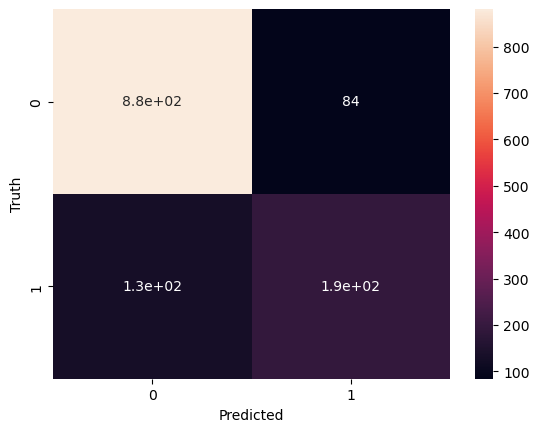

In [23]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       965
         1.0       0.69      0.60      0.64       319

    accuracy                           0.83      1284
   macro avg       0.78      0.76      0.77      1284
weighted avg       0.83      0.83      0.83      1284



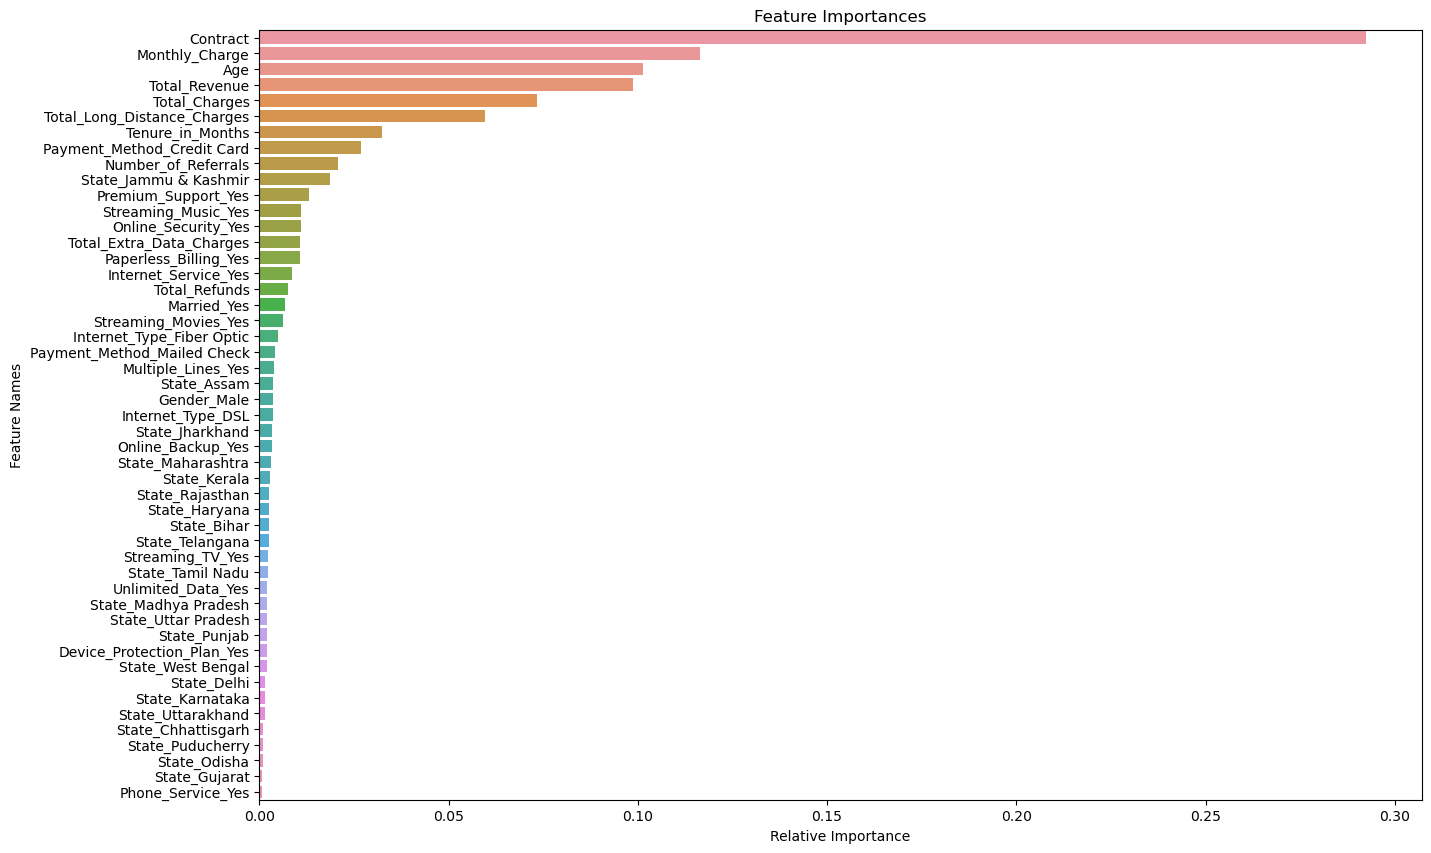

In [25]:
import seaborn as sns
importances = best_model_tuned.feature_importances_
indices = np.argsort(importances)[::-1]
# Plot the feature importances

plt.figure(figsize=(15, 10))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [26]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[881  84]
 [128 191]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       965
         1.0       0.69      0.60      0.64       319

    accuracy                           0.83      1284
   macro avg       0.78      0.76      0.77      1284
weighted avg       0.83      0.83      0.83      1284



In [58]:
joined_df = df[df['Customer_Status']=='Joined']
joined_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
17,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,One Year,Yes,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,NaN,NaN
23,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,NaN,NaN
48,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,Yes,DSL,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,NaN,NaN
98,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,NaN,NaN
104,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,NaN,NaN


In [59]:
joined_df.shape

(411, 32)

In [60]:
joined_df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [61]:
joined_df.to_csv("newly_joined.csv",index=False)
joined_df.to_excel("newly_joined.xlsx",index=False)

In [62]:
test_df = joined_df.copy()

In [63]:



# Step 1: Drop unnecessary columns
columns_to_drop = ['Customer_ID', 'Value_Deal','Customer_Status', 'Churn_Category', 'Churn_Reason']
test_df.drop(columns=columns_to_drop, axis='columns', inplace=True)



# Step 2: Handle missing values
null_val_cols = ['Multiple_Lines', 'Internet_Type', 'Online_Security', 'Online_Backup',
                 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
                 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data']

for col in null_val_cols:
    mode_value = test_df[col].mode()[0]
    test_df[col].fillna(mode_value, inplace=True)

    
    
# Step 3: Map categorical columns
# status_mapping = {'Stayed': 0, 'Joined': 0, 'Churned': 1}
contract_mapping = {'Month-to-Month': 0, 'One Year': 1, 'Two Year': 2}

# df1['Customer_Status'] = df1['Customer_Status'].map(status_mapping)
test_df['Contract'] = test_df['Contract'].map(contract_mapping)



# Step 4: Apply One-Hot Encoding to remaining categorical columns
categorical_columns = test_df.select_dtypes(include=['object']).columns
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)



# Step 5: Scale numerical features
numerical_columns = test_df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
test_df[numerical_columns] = scaler.fit_transform(test_df[numerical_columns])


In [64]:
test_df.sample(5)

,Age,Number_of_Referrals,Tenure_in_Months,Contract,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Gender_Male,Married_Yes,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Gujarat,State_Haryana,State_Jammu & Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Odisha,State_Puducherry,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Phone_Service_Yes,Multiple_Lines_Yes,Internet_Service_Yes,Internet_Type_DSL,Internet_Type_Fiber Optic,Online_Security_Yes,Online_Backup_Yes,Device_Protection_Plan_Yes,Premium_Support_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Streaming_Music_Yes,Unlimited_Data_Yes,Paperless_Billing_Yes,Payment_Method_Credit Card,Payment_Method_Mailed Check
3418,0.925373,0.533333,0.914286,0.5,0.892626,0.513803,0.0,0.142857,0.444624,0.543980,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0
241,0.626866,1.000000,0.200000,0.0,0.453644,0.327812,0.0,0.000000,0.314125,0.340686,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5322,0.597015,1.000000,0.828571,0.0,0.240621,0.047011,0.0,0.000000,0.051313,0.045959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
5064,0.343284,0.933333,0.800000,0.0,0.458387,0.083136,0.0,0.000000,0.284371,0.152114,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
4131,0.074627,0.800000,0.028571,0.0,0.493747,0.246727,0.0,0.000000,0.547384,0.361457,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0


In [65]:
pred = best_model_tuned.predict(test_df)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [66]:
joined_df['Predictions'] = pred
joined_df

C:\Users\sajal\AppData\Local\Temp\ipykernel_15056\1911613382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['Predictions'] = pred


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Predictions
17,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,One Year,Yes,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87,Joined,NaN,NaN,0.0
23,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.85,57.20,0.0,0,9.36,66.56,Joined,NaN,NaN,0.0
48,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,Yes,DSL,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,44.30,44.30,0.0,0,42.95,87.25,Joined,NaN,NaN,0.0
98,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.95,58.00,0.0,0,8.07,66.07,Joined,NaN,NaN,0.0
104,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.05,33.70,0.0,0,3.62,37.32,Joined,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,31412-HAR,Female,81,Yes,Haryana,14,29,NaN,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Bank Withdrawal,19.20,37.20,0.0,0,14.06,51.26,Joined,NaN,NaN,0.0
6374,54997-UTT,Female,55,No,Uttar Pradesh,7,23,NaN,Yes,No,Yes,DSL,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,44.00,44.00,0.0,0,26.15,70.15,Joined,NaN,NaN,0.0
6392,56728-RAJ,Male,40,No,Rajasthan,0,1,NaN,Yes,No,Yes,DSL,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,45.60,45.60,0.0,0,37.44,83.04,Joined,NaN,NaN,0.0
6401,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,NaN,Yes,No,Yes,DSL,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,No,Mailed Check,-5.00,189.10,0.0,0,100.59,289.69,Joined,NaN,NaN,0.0


In [70]:
predicted_churners = joined_df[joined_df['Predictions'] == 1].copy()
predicted_churners.shape

(23, 33)

In [71]:
predicted_churners.to_csv('predictions.csv',index=False)